credits: APEKSHA PRIYA, Priya Dwivedi

https://github.com/priya-dwivedi/face_and_emotion_detection/blob/master/src/EmotionDetector_v2.ipynb
https://towardsdatascience.com/face-detection-recognition-and-emotion-detection-in-8-lines-of-code-b2ce32d4d5de

In [8]:

from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from keras.regularizers import l1

from keras.models import load_model

In [9]:
# initializing
num_classes = 5
img_rows, img_cols = 48, 48
batch_size = 8 #(change back for full load)

train_data_dir = '../datasets/train'
validation_data_dir = '../datasets/validate'

In [10]:
# Let's use some data augmentaiton 
# train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
        rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 489 images belonging to 5 classes.
Found 70 images belonging to 5 classes.


In [11]:
print(validation_generator.class_indices)

{'angry': 0, 'disgust': 1, 'happy': 2, 'neutral': 3, 'sad': 4}


In [ ]:
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(48,48,1)))
# model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(5, kernel_size=(1, 1), activation='relu'))
# # model.add(BatchNormalization())

model.add(Conv2D(5, kernel_size=(4, 4), activation='relu'))
# model.add(BatchNormalization())

model.add(Flatten())

model.add(Activation("softmax"))

model.summary()
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))
# model.add(Conv2D(5, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())

In [12]:
# Create the model 2
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(48,48,1)))
# model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(5, kernel_size=(1, 1), activation='relu'))
# # model.add(BatchNormalization())

model.add(Conv2D(5, kernel_size=(4, 4), activation='relu'))
# model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
#model.add(Activation("softmax"))

model.summary()
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))
# model.add(Conv2D(5, kernel_size=(4, 4), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
# model.add(BatchNormalization())
# model.add(Activation("softmax"))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)        

In [14]:
# If you want to train the same model or try other models, go for this


# filepath = os.path.join("./emotion_detector_models/model_v6_{epoch}.hdf5")

checkpoint = keras.callbacks.ModelCheckpoint('rong_test_2.hdf5',
                                             monitor='val_accuracy',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')

callbacks = [checkpoint]

# checkpoint = ModelCheckpoint('rong_test_2.hdf5',
#                              monitor='val_loss',
#                              mode='min',
#                              save_best_only=True,
#                              verbose=1)

# earlystop = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=9,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

# reduce_lr = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)

# callbacks = [checkpoint,reduce_lr]
# callbacks = [earlystop,checkpoint,reduce_lr]


# if mode == "train":
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
nb_train_samples = 489
nb_validation_samples = 70
epochs = 40
model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            callbacks = callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples // batch_size)

# plot_model_history(model_info)
model.save_weights('rong_test_2.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
60/61 [============================>.] - ETA: 0s - loss: 1.6096 - accuracy: 0.2093
Epoch 00001: val_accuracy improved from -inf to 0.20312, saving model to rong_test_2.hdf5
61/61 [==============================] - 2s 30ms/step - loss: 1.6096 - accuracy: 0.2121 - val_loss: 1.6095 - val_accuracy: 0.2031
Epoch 2/40
60/61 [============================>.] - ETA: 0s - loss: 1.6089 - accuracy: 0.2600
Epoch 00002: val_accuracy did not improve from 0.20312
61/61 [==============================] - 2s 28ms/step - loss: 1.6089 - accuracy: 0.2599 - val_loss: 1.6094 - val_accuracy: 0.2031
Epoch 3/40
60/61 [============================>.] - ETA: 0s - loss: 1.6086 - accuracy: 0.2537
Epoch 00003: val_accuracy did not improve from 0.20312
61/61 [==============================] - 2s 30ms/step - loss: 1.6086 - accuracy: 0.2516 - val_loss: 1.6095 - val_accuracy: 0.2031
Epoch 4/40
60/61 [============================>.] - 

61/61 [==============================] - ETA: 0s - loss: 1.6030 - accuracy: 0.2557
Epoch 00029: val_accuracy did not improve from 0.21875
61/61 [==============================] - 2s 36ms/step - loss: 1.6030 - accuracy: 0.2557 - val_loss: 1.6139 - val_accuracy: 0.1875
Epoch 30/40
60/61 [============================>.] - ETA: 0s - loss: 1.6029 - accuracy: 0.2579
Epoch 00030: val_accuracy did not improve from 0.21875
61/61 [==============================] - 2s 38ms/step - loss: 1.6030 - accuracy: 0.2578 - val_loss: 1.6141 - val_accuracy: 0.1875
Epoch 31/40
60/61 [============================>.] - ETA: 0s - loss: 1.6015 - accuracy: 0.2600
Epoch 00031: val_accuracy did not improve from 0.21875
61/61 [==============================] - 2s 36ms/step - loss: 1.6024 - accuracy: 0.2557 - val_loss: 1.6171 - val_accuracy: 0.1719
Epoch 32/40
60/61 [============================>.] - ETA: 0s - loss: 1.6013 - accuracy: 0.2600
Epoch 00032: val_accuracy did not improve from 0.21875
61/61 [===============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


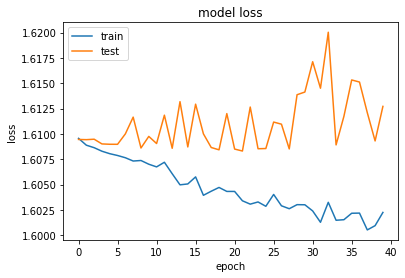

In [15]:
print(model_info.history.keys())

import matplotlib.pyplot as plt
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# model.load_weights('rong_test_2.h5')

In [ ]:

# model_info = model.fit_generator(
#             train_generator,
#             steps_per_epoch=nb_train_samples // batch_size,
#             epochs=epochs,
#             callbacks = callbacks,
#             validation_data=validation_generator,
#             validation_steps=nb_validation_samples // batch_size)

In [ ]:

# plt.plot(model_info.history['loss'])
# plt.plot(model_info.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
# model.load_weights('rong_test_2.h5')
# # history = model.fit_generator(
# #     train_generator,
# #     steps_per_epoch = nb_train_samples // batch_size,
# #     epochs = epochs,
# #     callbacks = callbacks,
# #     validation_data = validation_generator,
# #     validation_steps = nb_validation_samples // batch_size)

In [ ]:

# import matplotlib.pyplot as plt
# import sklearn
# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np
# # Found 28709 images belonging to 7 classes.
# # Found 3589 images belonging to 7 classes.


# # nb_train_samples = 28273
# # nb_validation_samples = 3534
# nb_train_samples = 140
# nb_validation_samples = 70

# # We need to recreate our validation generator with shuffle = false
# validation_generator = val_datagen.flow_from_directory(
#         validation_data_dir,
#         color_mode = 'grayscale',
#         target_size=(img_rows, img_cols),
#         batch_size=batch_size,
#         class_mode='categorical',
#         shuffle=False)

# class_labels = validation_generator.class_indices
# class_labels = {v: k for k, v in class_labels.items()}
# classes = list(class_labels.values())

# #Confution Matrix and Classification Report
# Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
# y_pred = np.argmax(Y_pred, axis=1)

# print('Confusion Matrix')
# print(confusion_matrix(validation_generator.classes, y_pred))
# print('Classification Report')
# target_names = list(class_labels.values())
# print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# plt.figure(figsize=(8,8))
# cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

# plt.imshow(cnf_matrix, interpolation='nearest')
# plt.colorbar()
# tick_marks = np.arange(len(classes))
# _ = plt.xticks(tick_marks, classes, rotation=90)
# _ = plt.yticks(tick_marks, classes)

In [ ]:


# classifier = load_model('./emotion_detector_models/model_v3_71.hdf5')

In [ ]:
# validation_generator = val_datagen.flow_from_directory(
#         validation_data_dir,
#         color_mode = 'grayscale',
#         target_size=(img_rows, img_cols),
#         batch_size=batch_size,
#         class_mode='categorical',
#         shuffle=False)

# class_labels = validation_generator.class_indices
# class_labels = {v: k for k, v in class_labels.items()}
# classes = list(class_labels.values())
# print(class_labels)

In [ ]:
from keras.models import load_model
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = path
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path
    file_names = [f for f in listdir(file_path)]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height),grayscale=True), final_path, path_class

# dimensions of our images
img_width, img_height = 48, 48

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = '../datasets/validate' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from time import sleep
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier('../datasets/classifiers/haarcascade_frontalface_default.xml')
classifier =load_model('rong_test_2.hdf5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:

# cap.release()
# cv2.destroyAllWindows()